In [2]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to import seaborn for heatmap visualization


In [21]:
from fastai.vision.all import *
import timm

In [22]:
# Step 1: Load and Prepare Your Data
path = "./chest_xray/"  # Replace with the actual path to your dataset


In [23]:
# Define the DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)

C:\Users\KARAN JADHAV\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [24]:
# Create the DataLoaders
dls = dblock.dataloaders(path, bs=64)

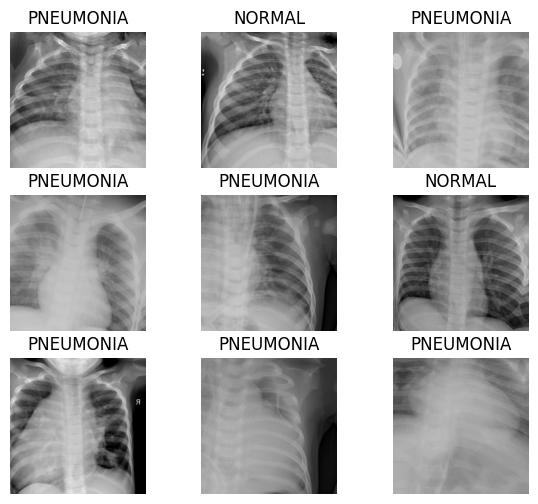

In [25]:
dls.show_batch(max_n=9, figsize=(7,6))

In [35]:
# Step 2: Create the Learner with Xception
model_path = "chest_xray_model"

In [33]:
import timm
# Define the custom Xception architecture
class XceptionModel(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super(XceptionModel, self).__init__()
        self.base_model = timm.create_model("xception", pretrained=pretrained)
        # Modify the last fully connected layer to match the number of classes
        self.fc = nn.Linear(self.base_model.num_features, num_classes)

    def forward(self, x):
        x = self.base_model.forward_features(x)
        x = F.adaptive_avg_pool2d(x, (1, 1)).reshape(x.size(0), -1)
        x = self.fc(x)
        return x

In [30]:
learn = Learner(dls, XceptionModel(num_classes=2), metrics=accuracy)

C:\Users\KARAN JADHAV\AppData\Roaming\Python\Python311\site-packages\timm\models\_factory.py:117: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(


In [36]:
learn.load(model_path)

In [39]:

# Assuming y_true and y_pred are your ground truth labels and predicted labels
y_true, y_pred, _ = learn.get_preds(dl=dls.valid)
y_true = y_true.argmax(dim=1)
y_pred = y_pred.argmax(dim=1)

C:\Users\KARAN JADHAV\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


ValueError: not enough values to unpack (expected 3, got 2)